# Assignment 2, 2020111018

In [5]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline, BSpline
from matplotlib import animation, rc
from mpl_toolkits import mplot3d

## Question 1.1.1

The diffusion equation is defined by  
$
\large\frac{\partial P(x,t)}{ \partial t} = D\frac{\partial^2 P(x,t)}{ \partial x^2}$


Assuming D = 0.1, we get:

$\large P(x_i, t_{i+1}) = P(x_i, t_{i}) + D[(P(x_{i+1}, t_{i}) + P(x_{i-1}, t_{i}) - 2P(x_{i}, t_{i})]$


$\large=P(x_i, t_{i+1}) = P(x_i, t_{i}) + 0.1 [(P(x_{i+1}, t_{i}) + P(x_{i-1}, t_{i}) - 2P(x_{i}, t_{i})]$


<br/>
With the inital condition that P(0,0) = 1 and P(x,0) (for all other x) = 0, I will find the probability distribution 4 timesteps in the future.


<hr/>

At $t = 0$

$P(0,0) = 1$ and $P(x,0)$ at $x \neq 0$ is 0

<br/>

At $t = 1$

$P(0,1) = P(0,0) + 0.1(P(-1, 0) + P(1,0) - 2P(0,0)) = 1 + 0.1(0 +0- 2*1) = 1 - 0.2 = 0.8$

$P(1,1) =  P(1,0) + 0.1(P(0,0) + P(2,0) - 2P(1,0)) = 0+0.1(1+0-0) = 0.1$

Similarly, $P(-1,1) =  P(-1,1) + 0.1(P(0,1) + P(-2,1) - 2P(-1,1)) = 0+0.1(1+0-0) = 0.1$

All other probabilites are $0$

(since the inital distribution is symmetric I will omit the calculation for P(-x, t) and just show P(x,t))


<br/>

At $t = 2$

$P(0,2) = P(0,1) + 0.1(P(-1, 1) + P(1,1) - 2P(0,1)) = 0.8 + 0.1(0.1 + 0.1 - 2*0.8) = 0.8 - 0.14 = 0.66$

$P(1,2) = P(-1,2) = P(1,1) + 0.1(P(0,1) + P(2,1) - 2P(1,1)) = 0.1+0.1(0.8+0-0.2) = 0.16$

$P(2,2) = P(-2,2) = P(2,1) + 0.1(P(1,1) + P(3,1) - 2P(2,1)) = 0 + 0.1(0.1 + 0 + 0) = 0.01$

All other probabilites are $0$

<br/>

At $t = 3$

$P(0,3) = P(0,2) + 0.1(P(-1, 2) + P(1,2) - 2P(0,2)) = 0.66 + 0.1(0.16 + 0.16 - 2*0.66) = 0.66 - 0.1 = 0.56$

$P(1,3) = P(-1,3) = P(1,2) + 0.1(P(0,2) + P(2,2) - 2P(1,2)) = 0.16+0.1(0.66+0.01-0.16*2) = 0.195$

$P(2,3) = P(-2,3) = P(2,2) + 0.1(P(1,2) + P(3,2) - 2P(2,2)) = 0.01 + 0.1(0.16 + 0 - 0.02) = 0.01 + 0.014 = 0.028$

$P(3,3) = P(-3,3) = P(3,2
) + 0.1(P(2,2) + P(4,2) - 2P(3,2)) = 0 + 0.1(0.1 + 0 - 0) = 0.01$


All other probabilites are $0$


  

## Question 1.1.2

D is the diffusivity of the particles and it affects how quickly the particles diffuse.

Expanding the diffusion equation gives us:

$\large P(x_i, t_{i+1}) = P(x_i, t_{i})(1-2D) + D[(P(x_{i+1}, t_{i}) + P(x_{i-1}, t_{i}))]$

So as D increases the probability of finding a particular particle at some (x,t+1) depends less and less on the probability at (x,t) as (1-2D) decreases and more on the probabilities at (x-1,t) and (x+1,t) as (D) increases.

As D increases, probabilities at some position are more and more dependent on the probabilities at adjacent postitions. A greater "fraction" of probability is transferred between positions and as a consequence, particles diffuse faster.


## Question 1.1.3

Using the same initial condition as 1.1.1, P(0,0) = 1 and all other P(x,0) = 0, I am using the formula to calculate the time evolution of the probability distribution for 100 timesteps. Since a particle can only move 1 unit distance per unit time, I am restricting calculating the function to x = (-101,101)


## Question 1.1.4

Since the initial condition is symmetric and particles diffuse to the, the mean remains at 0.
(The plot fluctuates due to floating point precision errors)

The mean square displacement steadily increases as the probability spreads out further and further

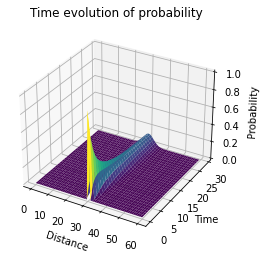

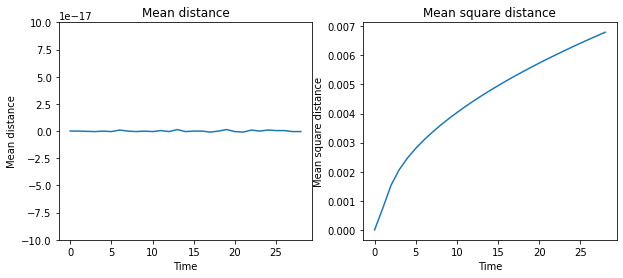

In [6]:
%matplotlib inline

limit = 60
maxT = int(limit/2) - 1
D = 0.15

# generate values 
# the inital condition is particles being evenly distributed across 5 steps
p = np.zeros((maxT, limit))
# p[0][int(limit/2) - 2] = 1/5
# p[0][int(limit/2) - 1] = 1/5
p[0][int(limit/2)] = 1
# p[0][int(limit/2) + 1] = 1/5
# p[0][int(limit/2) + 2] = 1/5

# calculate all probabilities with dp until maxT
for i in range(maxT-1):
    for j in range(1, limit-1):
        p[i+1][j] = p[i][j] + D*(p[i][j-1] + p[i][j+1] - 2*p[i][j])


# plot a 3D surface
x1 = np.linspace(0, limit, limit)
y1 = np.linspace(0, maxT, maxT)
X1, Y1 = np.meshgrid(x1, y1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, Y1, p, rstride=1, cstride=1, cmap='viridis')
ax.set_title('Time evolution of probability')
ax.set_xlabel('Distance')
ax.set_ylabel('Time')
ax.set_zlabel('Probability')


# plotting mean and mean squared distance
meanPos = np.zeros(maxT)
meanSquaredPos = np.zeros(maxT)
for i in range(maxT):
    for j in range(limit):
        p[i][j] *= j-int(limit/2)
    meanPos[i] = np.mean(p[i])
    meanSquaredPos[i] = np.mean(np.square(p[i]))


# plot the graphs
fig, (m, msq) = plt.subplots(ncols=2, figsize=(10,4))

m.set_title("Mean distance")
m.set_xlabel("Time")
m.set_ylabel("Mean distance")
m.set_ylim([-1e-16,1e-16])
m.plot(meanPos)

msq.set_title("Mean square distance")
msq.set_xlabel("Time")
msq.set_ylabel("Mean square distance")
msq.plot(meanSquaredPos)


## Question 1.2.1

The 2D diffusion equation is:

$\Large\frac{\partial u}{\partial t} = k(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2})$

where $u(x,y,t)$ is the temperature of the metal at some position and time.

## Question 1.2.2

The equation can be expanded to:


$\Large \frac{u(x,y,t_{i+1}) - u(x,y,t_{i})}{\Delta t} = k (\frac{u(x_{i+1},y_i, t_{i}) + u(x_{i-1}, y_i, t_{i}) - 2u(x_{i}, y_i, t_{i})}{\Delta x^2}$
$\Large+ \frac{u(x_{i},y_{i+1}, t_{i}) + u(x_{i}, y_{i-1}, t_{i}) - 2u(x_{i}, y_i, t_{i})}{\Delta x^2})$

=

$\Large {u(x,y,t_{i+1}) - u(x,y,t_{i})} = \frac{k\Delta t}{\Delta x^2}( {u(x_{i+1},y_i, t_{i}) + u(x_{i-1}, y_i, t_{i}) - 2u(x_{i}, y_i, t_{i})}$
$\Large+ {u(x_{i},y_{i+1}, t_{i}) + u(x_{i}, y_{i-1}, t_{i}) - 2u(x_{i}, y_i, t_{i})})$

=

$\Large {u(x,y,t_{i+1}) - u(x,y,t_{i})} = D({u(x_{i+1},y_i, t_{i}) + u(x_{i-1}, y_i, t_{i}) - 2u(x_{i}, y_i, t_{i})}$
$\Large+ {u(x_{i},y_{i+1}, t_{i}) + u(x_{i}, y_{i-1}, t_{i}) - 2u(x_{i}, y_i, t_{i})})$

where $ D = \frac{k\Delta t}{\Delta x^2} $

=

$\Large u(x,y,t_{i+1}) = (1-4D)u(x,y,t_{i}) + D(u(x_{i+1},y_i, t_{i}) + u(x_{i-1}, y_i, t_{i})$
$\Large+ u(x_{i},y_{i+1}, t_{i}) + u(x_{i}, y_{i-1}, t_{i}))$

where $ D = \frac{k\Delta t}{\Delta x^2} $


## Question 1.2.3

The coefficient of $u(x,y,t_i)$ must be positive. Thus $(1-4D) > 0 \equiv 1- 4\frac{k\Delta t}{\Delta x^2} > 0 \equiv$
$4\frac{k\Delta t}{\Delta x^2} < 1 \equiv \Delta t < \frac{\Delta x^2}{4k}$

The above is our limit